In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [10]:
#1. Read the dataset to python environment.
dataset = pd.read_csv('E:\ict/Wholesale customers data.csv')

In [12]:
 #Step 2: Data Preprocessing
data = dataset.drop(['Channel', 'Region'], axis=1)

In [13]:
# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [15]:
# Step 4: Try different clustering models
# KMeans
kmeans_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    kmeans_scores.append(silhouette_score(scaled_data, kmeans.labels_))

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [16]:
# Agglomerative Clustering
agg_scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(scaled_data)
    agg_scores.append(silhouette_score(scaled_data, agg.labels_))


In [17]:
# Gaussian Mixture Model
gmm_scores = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_data)
    gmm_scores.append(silhouette_score(scaled_data, gmm.predict(scaled_data)))


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [18]:
# Step 5: Find the optimum number of clusters
optimal_k_kmeans = kmeans_scores.index(max(kmeans_scores)) + 2
optimal_k_agg = agg_scores.index(max(agg_scores)) + 2
optimal_k_gmm = gmm_scores.index(max(gmm_scores)) + 2


In [19]:
# Step 6: Create models with the optimum number of clusters
kmeans_model = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
agg_model = AgglomerativeClustering(n_clusters=optimal_k_agg)
gmm_model = GaussianMixture(n_components=optimal_k_gmm, random_state=42)

In [20]:
# Step 7: Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(scaled_data)


DBSCAN()

In [21]:
# Step 8: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)



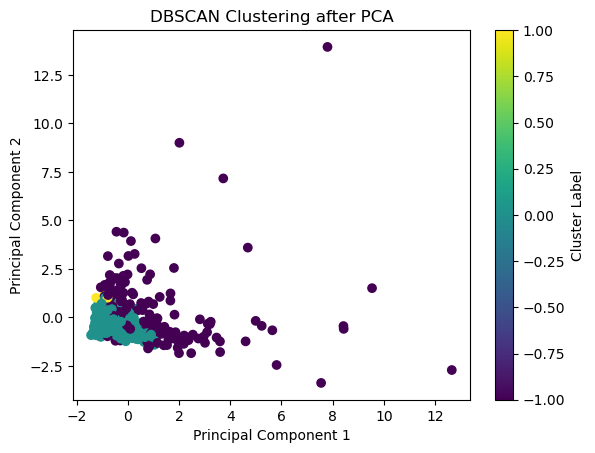

In [22]:

# Visualize the data after PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_model.labels_, cmap='viridis')
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()